In [25]:
# Step 1: Set Up Environment
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model  # Ensure load_model is imported
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [11]:
# Step 2: Data Preparation
# Define path to your dataset directory
dataset_dir = '/content/drive/MyDrive/med image processing/Medicinal plant dataset'  # Replace with the actual path to your dataset

# Create directories for training, validation, and test sets
base_dir = '/content/split_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the dataset into training, validation, and test sets
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        images = os.listdir(category_dir)
        train_images, val_test_images = train_test_split(images, test_size=0.4, random_state=42)
        val_images, test_images = train_test_split(val_test_images, test_size=0.5, random_state=42)

        train_category_dir = os.path.join(train_dir, category)
        val_category_dir = os.path.join(val_dir, category)
        test_category_dir = os.path.join(test_dir, category)

        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(val_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)

        for image in train_images:
            shutil.copy(os.path.join(category_dir, image), train_category_dir)
        for image in val_images:
            shutil.copy(os.path.join(category_dir, image), val_category_dir)
        for image in test_images:
            shutil.copy(os.path.join(category_dir, image), test_category_dir)

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the newly created split directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 3552 images belonging to 40 classes.
Found 1185 images belonging to 40 classes.
Found 1218 images belonging to 40 classes.


In [12]:
# Step 3: Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Step 4: Training
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 523s 5s/step - accuracy: 0.5658 - loss: 1.4026 - val_accuracy: 0.5932 - val_loss: 1.3990
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 561s 5s/step - accuracy: 0.5781 - loss: 1.3393 - val_accuracy: 0.6532 - val_loss: 1.1839
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 524s 5s/step - accuracy: 0.5738 - loss: 1.3572 - val_accuracy: 0.6118 - val_loss: 1.3958
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 559s 5s/step - accuracy: 0.5943 - loss: 1.3088 - val_accuracy: 0.6557 - val_loss: 1.1761
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.5826 - loss: 1.2798 - val_accuracy: 0.6768 - val_loss: 1.1312
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - accuracy: 0.5955 - loss: 1.2405 - val_accuracy: 0.6574 - val_loss: 1.1831
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 521s 5s/step - accuracy: 0.6003 - loss: 1.2002 - val_accuracy: 0.6945 - val_loss: 1.0475
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 568s 5s/step - accuracy: 0.6026 - loss: 1.1755 - val_accu

In [17]:
# Step 5: Evaluation
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

39/39 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.6548 - loss: 1.1873
Test Accuracy: 0.64


39/39 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step
Classification Report
               precision    recall  f1-score   support

     Aloevera       0.54      0.57      0.56        35
         Amla       1.00      0.57      0.72        30
 Amruta_Balli       0.75      0.30      0.43        30
        Arali       0.90      0.90      0.90        30
       Ashoka       0.77      0.90      0.83        30
  Ashwagandha       0.83      0.80      0.81        30
      Avacado       0.69      0.67      0.68        30
       Bamboo       0.76      0.87      0.81        30
       Basale       0.76      0.43      0.55        30
        Betel       0.62      0.77      0.69        31
    Betel_Nut       0.69      0.83      0.76        30
       Brahmi       0.58      0.70      0.64        30
       Castor       0.58      0.56      0.57        32
   Curry_Leaf       0.53      0.53      0.53        30
   Doddapatre       0.92      0.77      0.84        30
         Ekka       0.80      0.80      0.80        30
   

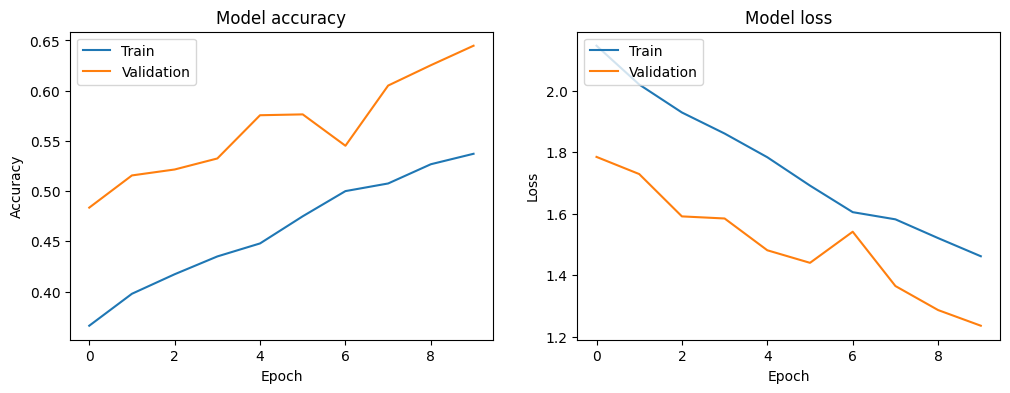

In [18]:
# Step 6: Metrics and Visualization

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# Step 7: Save the Model
model.save('medicinal_plant_classifier.h5')

In [26]:
# Step 8: Function to Identify a Plant from an Image
def identify_plant(image_path, model, class_indices):
    # Load the image
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to an array
    img_array = img_to_array(img)
    # Rescale the image
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)

    # Map the predicted class index to the class label
    class_labels = {v: k for k, v in class_indices.items()}
    predicted_label = class_labels[predicted_class[0]]

    print(f"The plant in the image is identified as: {predicted_label}")
    return predicted_label

# Load the saved model and class indices
loaded_model = load_model('/content/medicinal_plant_classifier.h5')
class_indices = train_generator.class_indices

# Example Usage
image_path = '/content/neem.jpeg'  # Replace with the actual path of the image you want to scan
identify_plant(image_path, loaded_model, class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
The plant in the image is identified as: Wood_sorel


'Wood_sorel'